In [1]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#using yahoo finace API


ModuleNotFoundError: No module named 'yfinance'

In [2]:
ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
#retrieving data from yfinance API
# Display the data
print(data)

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2020-01-02   72.796013   75.087502   75.150002   73.797501   74.059998   
2020-01-03   72.088287   74.357498   75.144997   74.125000   74.287498   
2020-01-06   72.662712   74.949997   74.989998   73.187500   73.447502   
2020-01-07   72.320999   74.597504   75.224998   74.370003   74.959999   
2020-01-08   73.484360   75.797501   76.110001   74.290001   74.290001   
...                ...         ...         ...         ...         ...   
2022-12-23  130.487793  131.860001  132.419998  129.639999  130.919998   
2022-12-27  128.676834  130.029999  131.410004  128.720001  131.380005   
2022-12-28  124.728371  126.040001  131.029999  125.870003  129.669998   
2022-12-29  128.261215  129.610001  130.479996  127.730003  127.989998   
2022-12-30  128.577866  129.929993  12

In [3]:
#Checking for duplicates and nulls
print(data.duplicated().sum())
data.isnull().sum()

0


Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [4]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,127.940988,130.311812,131.892775,128.614983,130.231998,1.120920e+08
std,30.494848,30.566496,30.841435,30.287325,30.596429,5.602586e+07
min,54.509758,56.092499,57.125000,53.152500,57.020000,3.519590e+07
25%,112.981398,115.739374,117.275000,114.129997,115.924374,7.636470e+07
50%,133.331635,135.379997,137.200005,133.750000,135.794998,9.493580e+07
75%,148.579060,150.704998,151.902504,149.029995,150.259998,1.296327e+08
max,179.076599,182.009995,182.940002,179.119995,182.630005,4.265100e+08


In [5]:
print(data.shape)

(756, 6)


In [6]:
#lets get the average high for the month of january in 2022
data.index = pd.to_datetime(data.index)
condition1 = (data.index>='2022-01-01') & (data.index <="2022-01-31")
jan_data = data[condition1]
average_jan_high = jan_data['High'].mean()
print(average_jan_high)
#Using groupby
average = data.groupby(pd.Grouper(freq = 'M')).mean()
print(average)
average_jan_high2 = average.loc['2022-1-31','High']
print('Average High for January 2022: ',average_jan_high)





Ticker
AAPL    172.447999
dtype: float64
Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2020-01-31   75.599325   77.979048   78.581547   77.207857   77.792738   
2020-02-29   75.583303   77.817631   78.813158   76.681579   77.578421   
2020-03-31   63.759703   65.611023   67.423181   63.711591   65.268410   
2020-04-30   66.175089   68.096547   68.945357   67.021072   67.952857   
2020-05-31   75.464749   77.496376   78.312875   76.595250   77.221375   
2020-06-30   84.239641   86.451590   87.336250   85.160681   86.135341   
2020-07-31   93.121091   95.566250   96.586818   94.265682   95.417500   
2020-08-31  114.467583  117.299762  118.565596  115.556666  116.969881   
2020-09-30  112.381899  115.125237  118.036190  112.584762  116.079048   
2020-10-31  113.639157  116.413182  118.274546  114.911363  116.694090 

C:\Users\Angel\AppData\Local\Temp\ipykernel_20124\196658873.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  average = data.groupby(pd.Grouper(freq = 'M')).mean()


In [7]:
#Obtaining the average for each month 
#average = data.groupby(pd.Grouper(freq = 'M')).mean()
#print(average) 
monthly_average_high = data['High'].groupby(pd.Grouper(freq = 'M')).mean()

data.index = pd.to_datetime(data.index)

# Group by month and calculate the average High for each month
monthly_average_high = data['High'].groupby(pd.Grouper(freq='M')).mean()

# Ensure the index of the grouped data is a DatetimeIndex
monthly_average_high.index = pd.to_datetime(monthly_average_high.index)

# Print the average High for each month
for month, avg_high in monthly_average_high.items():
    month_str = f"{month.month}-{month.year}"  # Access month and year attributes
    print(f"{month_str}: {avg_high:.2f}")



C:\Users\Angel\AppData\Local\Temp\ipykernel_20124\2848844211.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_high = data['High'].groupby(pd.Grouper(freq = 'M')).mean()
C:\Users\Angel\AppData\Local\Temp\ipykernel_20124\2848844211.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_high = data['High'].groupby(pd.Grouper(freq='M')).mean()


AttributeError: 'str' object has no attribute 'month'

Examining the Prices


In [8]:
#Obtaining the lowest priced stock
lowest_stock = data.loc[data['Low'].idxmin()]
print('Lowest priced stock\n',lowest_stock)
highest_stock = data.loc[data['High'].idxmax()]
print('Highest priced stock\n',highest_stock)



Lowest priced stock
 Price       Adj Close      Close    High      Low   Open     Volume
Ticker           AAPL       AAPL    AAPL     AAPL   AAPL       AAPL
Date                                                               
2020-03-23  54.509758  56.092499  57.125  53.1525  57.02  336752800
Highest priced stock
 Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-04  176.803833  179.699997  182.940002  179.119995  182.630005   

Price         Volume  
Ticker          AAPL  
Date                  
2022-01-04  99310400  


In [9]:
print(data.index)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None)


In [10]:
data.reset_index(inplace=True)
print(data.columns) 

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])


<Axes: xlabel='Date'>

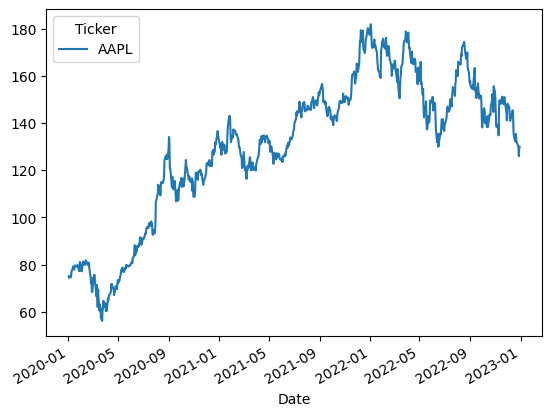

In [11]:

data.plot(kind='line', x='Date', y='Close')

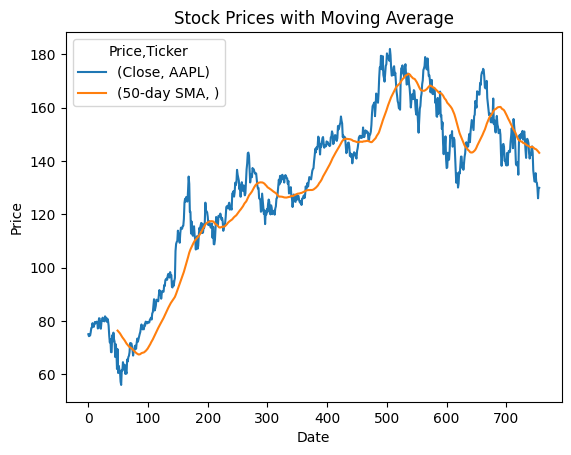

In [12]:
#Find the moving avergage 

data['50-day SMA'] = data['Close'].rolling(window=50).mean()

# Plot the closing prices and the 50-day SMA
data[['Close', '50-day SMA']].plot(kind='line', title="Stock Prices with Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


MultiIndex([(             'Date',     ''),
            (        'Adj Close', 'AAPL'),
            (            'Close', 'AAPL'),
            (             'High', 'AAPL'),
            (              'Low', 'AAPL'),
            (             'Open', 'AAPL'),
            (           'Volume', 'AAPL'),
            (       '50-day SMA',     ''),
            (     'Daily Return',     ''),
            ('30-day Volatility',     '')],
           names=['Price', 'Ticker'])
Price              Ticker
Daily Return                  1
30-day Volatility            30
dtype: int64


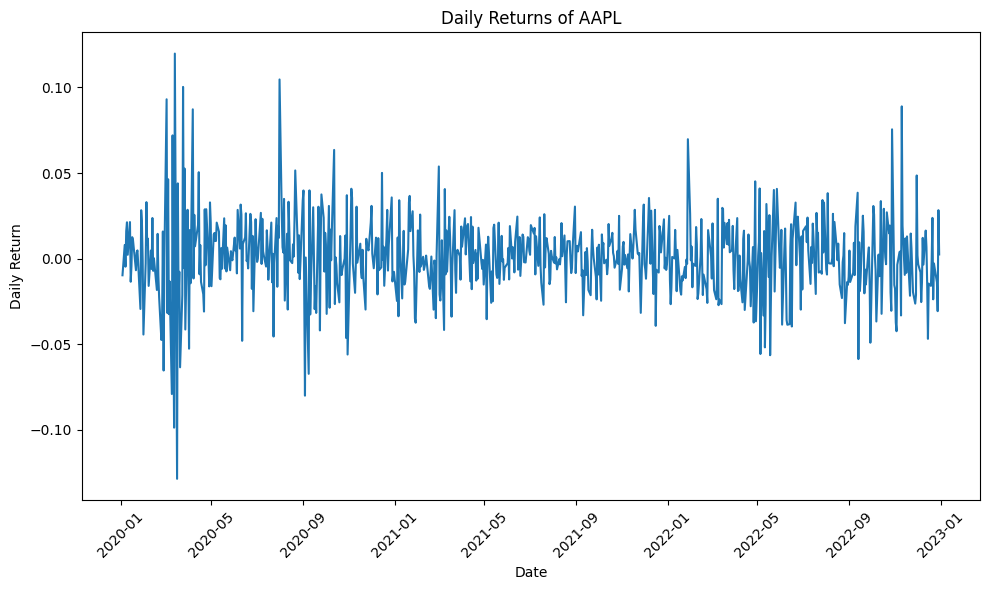

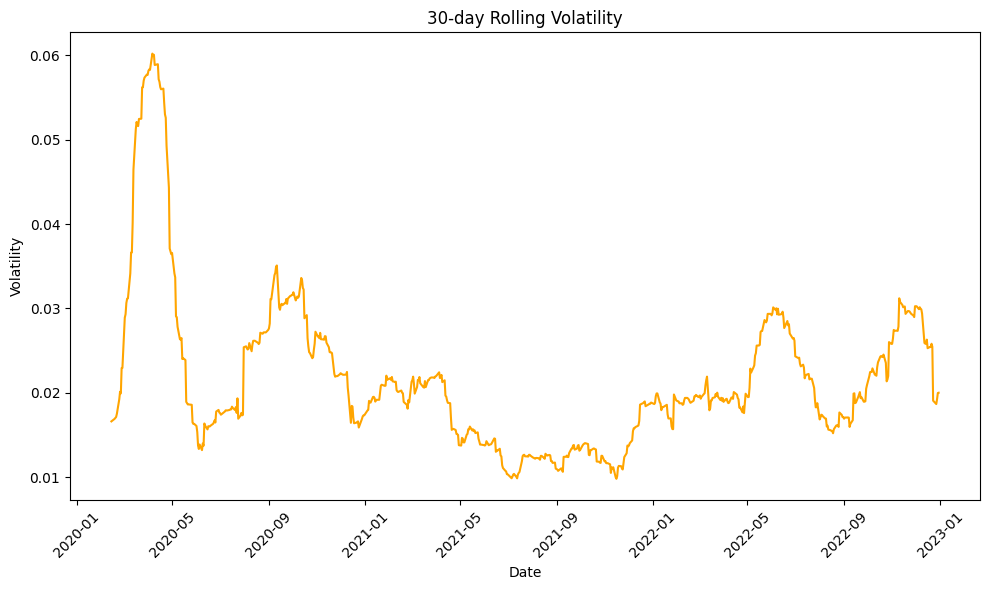

In [14]:


data['Daily Return'] = data['Close'].pct_change()
data['30-day Volatility'] = data['Daily Return'].rolling(window=30).std()

# Verify that the columns exist and are correctly calculated
print(data.columns)  # This will show you all the columns in the DataFrame

# Check if NaN values exist
print(data[['Daily Return', '30-day Volatility']].isnull().sum())  # Count NaNs

# Plot daily returns with 'Date' as the x-axis
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Daily Return'], label="Daily Return")
plt.title("Daily Returns of AAPL")
plt.xlabel("Date")
plt.ylabel("Daily Return")

# Format the x-axis to display dates properly
plt.xticks(rotation=45)  # Rotate the dates for better readability
plt.tight_layout()  # Adjust layout to make sure labels fit
plt.show()

# Plot rolling volatility with 'Date' as the x-axis
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['30-day Volatility'], label="30-day Volatility", color='orange')
plt.title("30-day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")

# Format the x-axis to display dates properly
plt.xticks(rotation=45)  # Rotate the dates for better readability
plt.tight_layout()  # Adjust layout to make sure labels fit
plt.show()

